# Creating Dataset

In [1]:
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(1)
count = 0

# Collect samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = 'data/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (64, 64), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 50: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_16380/73177109.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

# Creating, Training and Testing the model

Found 590 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'Miit': 0, 'Sparsh': 1}
Epoch 1/10
5/5 [==============================] - 26s 5s/step - loss: 0.4236 - accuracy: 0.8542 - val_loss: 0.1631 - val_accuracy: 0.9900
Epoch 2/10
5/5 [==============================] - 22s 4s/step - loss: 1.0867 - accuracy: 0.7254 - val_loss: 0.6897 - val_accuracy: 0.5100
Epoch 3/10
5/5 [==============================] - 21s 4s/step - loss: 0.6597 - accuracy: 0.6017 - val_loss: 0.5072 - val_accuracy: 0.5100
Epoch 4/10
5/5 [==============================] - 21s 4s/step - loss: 0.1643 - accuracy: 0.9627 - val_loss: 0.1090 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 21s 4s/step - loss: 0.0488 - accuracy: 0.9932 - val_loss: 0.1068 - val_accuracy: 0.9800
Epoch 6/10
5/5 [==============================] - 24s 5s/step - loss: 0.0363 - accuracy: 0.9949 - val_loss: 0.0741 - val_accuracy: 0.9900
Epoch 7/10
5/5 [==============================] - 27s 5s/step - l

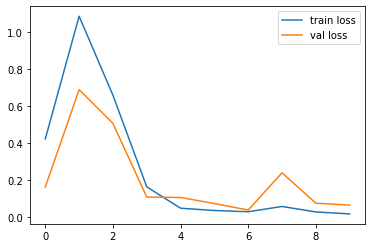

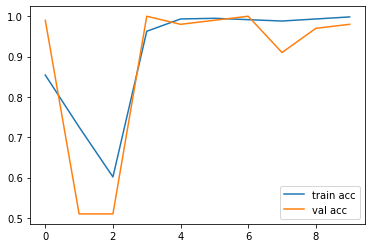

<Figure size 432x288 with 0 Axes>

In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

# re-size all the images to this
IMAGE_SIZE = [100, 80]

train_path = os.path.join('./dataset/Train')
test_path = os.path.join('./dataset/Test')

INPUT_SIZE = IMAGE_SIZE + [3]
model = Sequential([
    Input(shape=INPUT_SIZE),
    Conv2D(8, 7, activation='relu'),
    Dense(32, activation='relu'),
    Conv2D(8, 7, activation='relu'),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(2, activation='sigmoid')
])

# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=10,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(100, 80),
                                                 batch_size=128,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(100, 80),
                                            batch_size=128,
                                            class_mode='categorical')
print(training_set.class_indices)


# fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.jpg')

model.save('cardfeatures_model.h5')


# Real Time Face Recognition

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
model = load_model('./facefeatures_model_best.h5')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
FONT_THICKNESS=2
cap = cv2.VideoCapture(1)
cap.set(3,640) # set Width
cap.set(4,480) # set Height

while True:
    ret, image = cap.read()
    faces = faceCascade.detectMultiScale(
    image
    )
    for (x, y, w, h) in faces:
        crop = image[y:y+h, x:x+w]
        resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
        resized=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        resized=resized/255
        # print(resized.shape)
        a=model.predict(resized[np.newaxis, ...])[0]
        pred = np.argmax(a)
        print(a)
        if a[pred]>=0.65:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0) if pred else (0, 255, 0),3)
            cv2.putText(image, 'Sparsh' if pred else 'Miit', (x, y), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0) if pred else (0, 255, 0), 2, cv2.LINE_AA)
        # elif a[pred]<=0.6:
        #     cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0) if pred else (0, 255, 0),3)
        #     cv2.putText(image, 'Unknown', (x, y), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0) if pred else (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('video', image)
    k = cv2.waitKey(30)
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

[0.8670114  0.19012189]
[0.7483454 0.3538044]
[0.47799477 0.58166987]
[0.56881183 0.5926793 ]
[0.7241603 0.4091484]
[0.7230639  0.41682008]
[0.8671316  0.31598106]
[0.81913674 0.42328554]
[0.7372769  0.41167083]
[0.24619249 0.85857075]
[0.30713576 0.8017053 ]
[0.25088778 0.8361403 ]
[0.22886041 0.8540287 ]
[0.7353862  0.42906103]
[0.19256717 0.8795863 ]
[0.12622234 0.9191542 ]
[0.11933219 0.9245032 ]
[0.11271808 0.93014526]
[0.15897042 0.8945984 ]
[0.74694973 0.41576493]
[0.71127826 0.47862384]
[0.18667716 0.8793503 ]
[0.740821   0.42363638]
[0.16009602 0.898296  ]
[0.26627886 0.8222662 ]
[0.17181498 0.88867295]
[0.9250411  0.20300403]
[0.7452475 0.4172541]
[0.96425134 0.10311109]
[0.7285623  0.43744326]
[0.90262544 0.2506534 ]
[0.9129064  0.22767758]
[0.08800828 0.9472399 ]
[0.73150074 0.4335782 ]
[0.72376925 0.43598753]
[0.886709  0.2831093]
[0.7327228 0.4223537]
[0.1184862  0.92526424]
[0.96154606 0.11383161]
[0.74034363 0.40389335]
[0.14656988 0.90404576]
[0.8841384  0.27560073]
[0